In [1]:
import numpy as np
import pandas as pd
from matplotlib.patches import Patch
import itertools
import pickle
from matplotlib import pyplot as plt
import datetime
from scipy import optimize
import sys
sys.path.append('../SEIR_full/')
sys.path.append('..')
import SEIR_full as mdl
import datetime as dt
from scipy.stats import poisson
from scipy.stats import binom
import copy

In [2]:
plt.style.use('dean_style.conf')

# Import data

In [3]:
resp = pd.read_csv('../Data/sick/resp_country.csv')
hosp = pd.read_csv('../Data/sick/hospitalizations_country.csv')

In [4]:
resp['date'] = pd.to_datetime(resp.date, dayfirst=True)
hosp['date'] = pd.to_datetime(hosp.date, dayfirst=True)

In [5]:
resp.set_index('date',inplace=True)
hosp.set_index('date',inplace=True)
hosp = hosp['2020-03-02':].copy()

In [91]:
# import calibration parameters:
with open('../Data/calibration/calibration_sc1_dict.pickle', 'rb') as pickle_in:
    sc1_fitted_params = pickle.load(pickle_in)

## Examine data

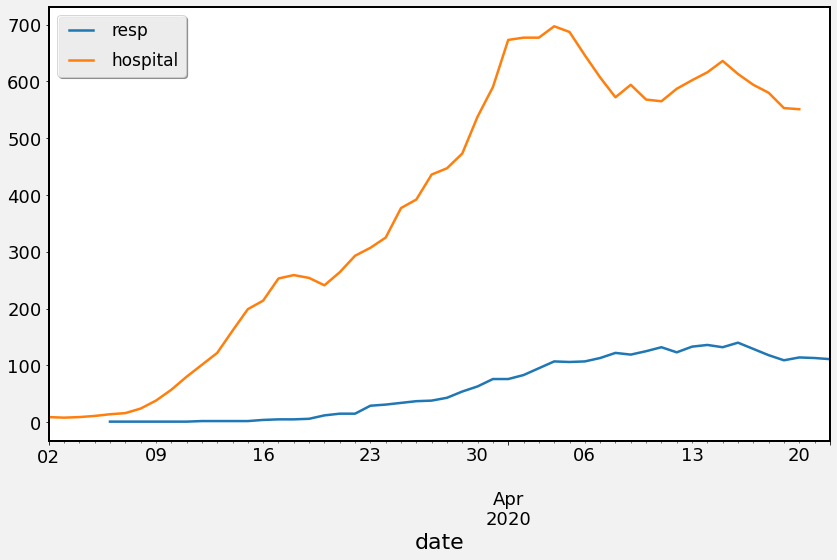

In [6]:
ax= plt.subplot()
resp.plot(ax=ax)
hosp.plot(ax=ax)

# Hospitalizations Calibration

In [107]:
start_date = '2020-03-02'
end_date = hosp.index[-1]

### Scenario 2

#### ML

In [8]:
# fit params
days_in_season=70
date_lst = pd.date_range('2020-02-20',end_date)
len(date_lst)

61

In [9]:
len(date_lst[11:61])

50

In [10]:
hosp.index[-1]

Timestamp('2020-04-20 00:00:00')

In [11]:
# Model Fitting
p0=(1/7., 0.1) # initial guess
bnds = ((0.05,1.0),(0.05,0.25))# boundries for variables

In [12]:
model_2_ml = mdl.Model_behave(
    beta_j=np.array([0.09883986 ,0.09883986 ,0.09883986 ,0.05334751,0.05334751,0.05144386,0.05144386,0.30902021,0.30902021]),
    theta=2.074502181457254,
    beta_behave=0.2364975456730552,
    eps=mdl.eps_sector['Scenario2'],
    f=mdl.f0_full['Scenario2'],
)

In [13]:
model_2_ml.reset()
res_fit_2_ml = model_2_ml.fit_tracking(
        p0=p0,
        bnds=bnds,
        data=hosp.values[:,0],
        date_lst = date_lst,
        days_in_season=days_in_season,
        start=start_date,
        end=end_date,
        loss_func='MSE',
        maxiter=300,
        factor=1,
        tracking='hosp'
    )

iter:  50  loss:  -23.801691999537784
iter:  100  loss:  -23.92847599196115
iter:  150  loss:  -23.93578016101528
iter:  200  loss:  -23.935879876390803


In [14]:
mdl.print_stat_fit_hosp(res_fit_2_ml)

minimized value: -23.935879878358524
Fitted parameters:
 Eta=0.8676140711537818
 Nu=0.07247553272296633,
 
num of sampling the target function: 55


In [15]:
model_2_ml.reset()
res_mdl_2_ml = model_2_ml.predict(
    C=mdl.C_calibration,
    days_in_season=200,
    stay_home_idx=mdl.stay_home_idx,
    not_routine=mdl.not_routine,
)

(<Figure size 1008x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2866e3348c8>)

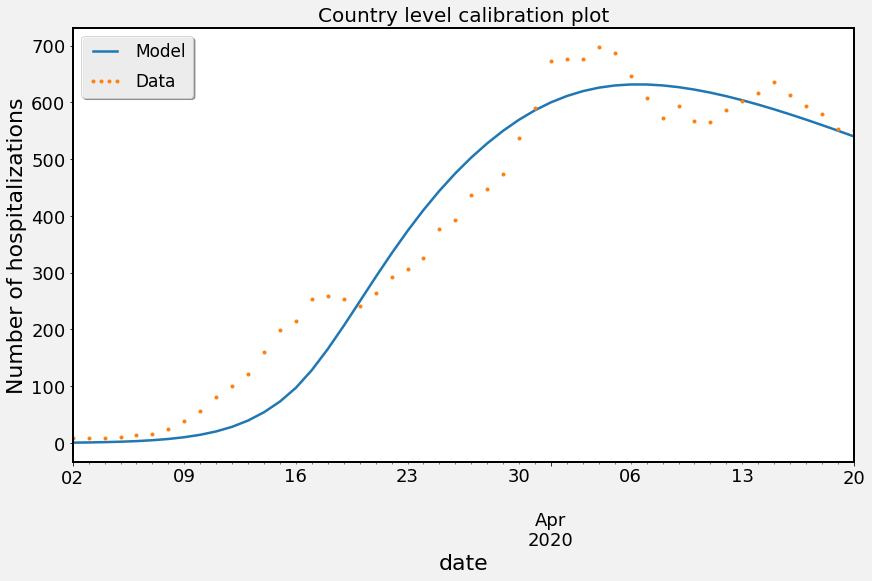

In [16]:
mdl.plot_hospitalizations_calibration(res_mdl_2_ml,hosp.values[:,0],date_lst,start_date=start_date,end_date=end_date)

### Scenario 1

In [92]:
sc1_fitted_params

{'ml': {'beta_j': array([0.12613143, 0.12613143, 0.12613143, 0.05380238, 0.05380238,
         0.05308456, 0.05308456, 0.21491134, 0.21491134]),
  'theta': 1.9795018496068204,
  'beta_behave': 0.21101978133981572},
 'ub': {'beta_j': array([0.15559057, 0.15559057, 0.15559057, 0.07505887, 0.07505887,
         0.09156761, 0.09156761, 0.34091583, 0.34091583]),
  'theta': 1.450842152574775,
  'beta_behave': 0.21213702659889408},
 'lb': {'beta_j': array([0.06825481, 0.06825481, 0.06825481, 0.02477477, 0.02477477,
         0.02173894, 0.02173894, 0.09063173, 0.09063173]),
  'theta': 2.6101521960945213,
  'beta_behave': 0.36055692423711205},
 '80%': {'beta_j': array([0.14665115, 0.14665115, 0.14665115, 0.06811326, 0.06811326,
         0.07776952, 0.07776952, 0.29529   , 0.29529   ]),
  'beta_behave': 0.21249821254490886,
  'theta': 1.4047213405317138},
 '75%': {'beta_j': array([0.14349232, 0.14349232, 0.14349232, 0.06567107, 0.06567107,
         0.07359085, 0.07359085, 0.28074984, 0.28074984]),

#### ML

In [108]:
# fit params
days_in_season=70
date_lst = pd.date_range('2020-02-20',end_date)
len(date_lst)

61

In [109]:
len(date_lst[11:61])

50

In [110]:
hosp.index[-1]

Timestamp('2020-04-20 00:00:00')

In [117]:
# Model Fitting
p0=(1/7., 0.1) # initial guess
bnds = ((0.05,1.0),(0.05,0.25))# boundries for variables

In [118]:
model_1_ml = mdl.Model_behave(
    beta_j=sc1_fitted_params['ml']['beta_j'],
    theta=sc1_fitted_params['ml']['theta'],
    beta_behave=sc1_fitted_params['ml']['beta_behave'],
    eps=mdl.eps_sector['Scenario1'],
    f=mdl.f0_full['Scenario1'],
)

In [119]:
model_1_ml.reset()
res_fit_1_ml = model_1_ml.fit_tracking(
        p0=p0,
        bnds=bnds,
        data=hosp.values[:,0],
        date_lst = date_lst,
        days_in_season=days_in_season,
        start=start_date,
        end=end_date,
        loss_func='MSE',
        maxiter=300,
        factor=1,
        tracking='hosp'
    )

iter:  50  loss:  -23.84968405318027
iter:  100  loss:  -23.86216740767771


In [120]:
mdl.print_stat_fit_hosp(res_fit_1_ml)

minimized value: -23.86216759110206
Fitted parameters:
 Eta=0.38985380574853645
 Nu=0.08645532837830751,
 
num of sampling the target function: 30


In [115]:
model_1_ml.reset()
res_mdl_1_ml = model_1_ml.predict(
    C=mdl.C_calibration,
    days_in_season=200,
    stay_home_idx=mdl.stay_home_idx,
    not_routine=mdl.not_routine,
)

(<Figure size 1008x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x286764f5988>)

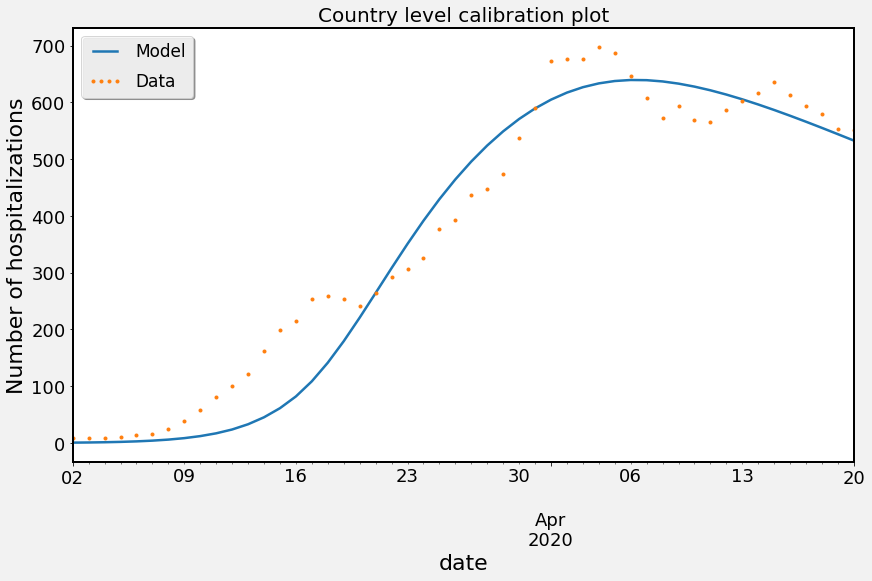

In [116]:
mdl.plot_hospitalizations_calibration(res_mdl_1_ml,hosp.values[:,0],date_lst,start_date=start_date,end_date=end_date)

In [131]:
sc1_fitted_params['eta'] = model_1_ml.eta
sc1_fitted_params['nu'] = model_1_ml.nu

# Respiratory

In [121]:
start_date = '2020-03-06'
end_date = resp.index[-1]

## Scenario 2



### ML

In [26]:
# fit params
days_in_season=70
date_lst = pd.date_range('2020-02-20',end_date)
len(date_lst)

63

In [85]:
# Model Fitting
p0=(0.05, 1/9.9) # initial guess
bnds = ((0.00,4),(1/14.,1/10.))# boundries for variables

In [86]:
model_2_ml_resp = mdl.Model_behave(
    beta_j=np.array([0.09883986 ,0.09883986 ,0.09883986 ,0.05334751,0.05334751,0.05144386,0.05144386,0.30902021,0.30902021]),
    theta=2.074502181457254,
    beta_behave=0.2364975456730552,
    eps=mdl.eps_sector['Scenario2'],
    f=mdl.f0_full['Scenario2'],
)

In [87]:
model_2_ml_resp.reset()
res_fit_2_ml_resp = model_2_ml_resp.fit_tracking(
        p0=p0,
        bnds=bnds,
        data=resp.values[:,0],
        date_lst = date_lst,
        days_in_season=days_in_season,
        start=start_date,
        end=end_date,
        loss_func='MSE',
        maxiter=300,
        factor=1,
        tracking='vents'
    )

iter:  50  loss:  -25.028223015649083
iter:  100  loss:  -25.29709915629871
iter:  150  loss:  -25.323872848721177


In [88]:
mdl.print_stat_fit_hosp(res_fit_2_ml_resp, tracking='vents')

minimized value: -25.323872848721177
Fitted parameters:
 Xi=0.23638829809201067
 Mu=0.07142857142857142,
 
num of sampling the target function: 38


In [89]:
model_2_ml_resp.reset()
# model_2_ml_resp.update({'xi':1/1., 'mu':1/9.9})
res_mdl_2_ml_resp = model_2_ml_resp.predict(
    C=mdl.C_calibration,
    days_in_season=200,
    stay_home_idx=mdl.stay_home_idx,
    not_routine=mdl.not_routine,
)

(<Figure size 1008x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x28672e44e88>)

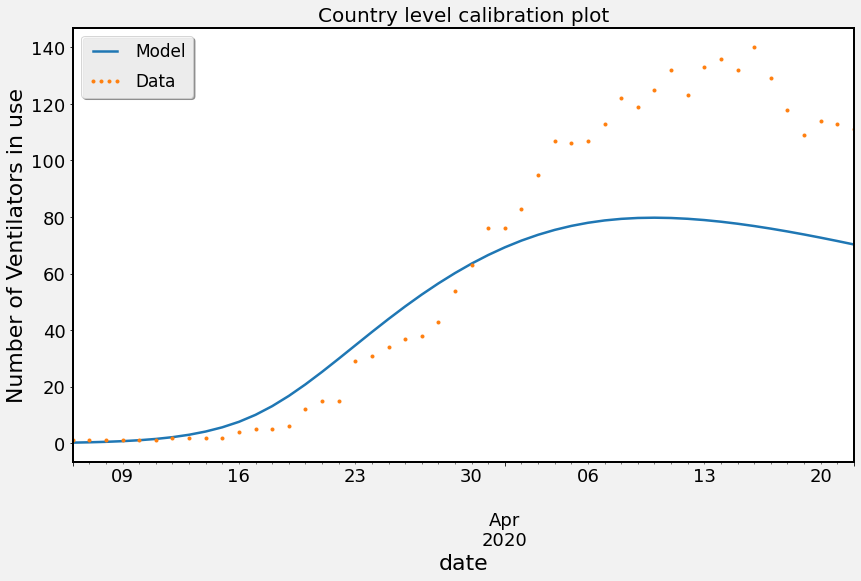

In [90]:
mdl.plot_hospitalizations_calibration(res_mdl_2_ml_resp,resp.values[:,0],date_lst,start_date=start_date,end_date=end_date,
                                     tracking='vents')

In [45]:
model_2_ml_resp.mu

0.029931064739349963

## Scenario 1

### ML

In [122]:
# fit params
days_in_season=70
date_lst = pd.date_range('2020-02-20',end_date)
len(date_lst)

63

In [123]:
# Model Fitting
p0=(0.05, 1/9.9) # initial guess
bnds = ((0.00,1),(1/14.,1/10.))# boundries for variables

In [124]:
model_1_ml_resp = mdl.Model_behave(
    beta_j=sc1_fitted_params['ml']['beta_j'],
    theta=sc1_fitted_params['ml']['theta'],
    beta_behave=sc1_fitted_params['ml']['beta_behave'],
    eps=mdl.eps_sector['Scenario1'],
    f=mdl.f0_full['Scenario1'],
)

In [125]:
model_1_ml_resp.reset()
res_fit_1_ml_resp = model_1_ml_resp.fit_tracking(
        p0=p0,
        bnds=bnds,
        data=resp.values[:,0],
        date_lst = date_lst,
        days_in_season=days_in_season,
        start=start_date,
        end=end_date,
        loss_func='MSE',
        maxiter=300,
        factor=1,
        tracking='vents'
    )

iter:  50  loss:  -26.015501876096753


In [126]:
mdl.print_stat_fit_hosp(res_fit_1_ml_resp, tracking='vents')

minimized value: -26.022560981126574
Fitted parameters:
 Xi=0.17516963309104622
 Mu=0.07142857142857142,
 
num of sampling the target function: 21


In [127]:
model_1_ml_resp.reset()
res_fit_1_ml_resp = model_1_ml_resp.predict(
    C=mdl.C_calibration,
    days_in_season=200,
    stay_home_idx=mdl.stay_home_idx,
    not_routine=mdl.not_routine,
)

(<Figure size 1008x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x286766bf108>)

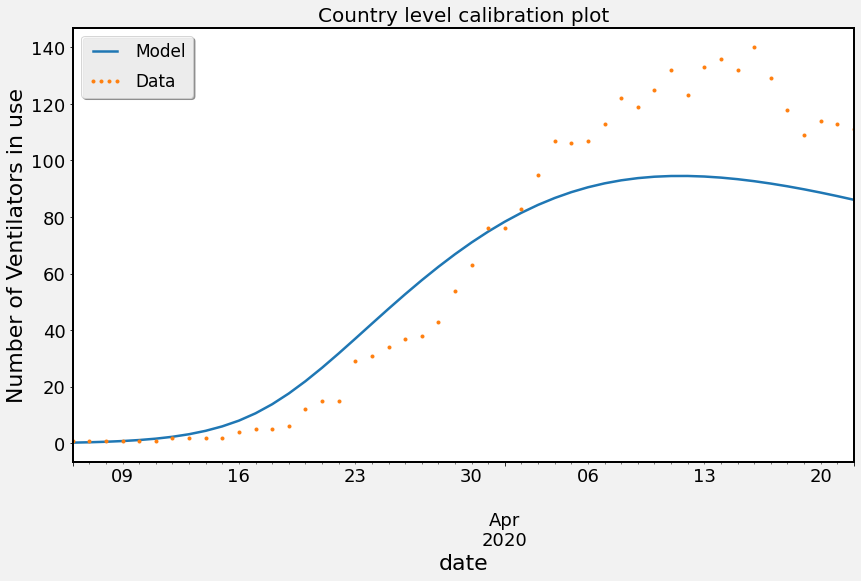

In [128]:
mdl.plot_hospitalizations_calibration(res_fit_1_ml_resp,resp.values[:,0],date_lst,start_date=start_date,end_date=end_date,
                                     tracking='vents')

In [134]:
sc1_fitted_params['xi'] = model_1_ml_resp.xi
sc1_fitted_params['mu'] = model_1_ml_resp.mu

In [135]:
# Save calibrated params
with open('../Data/calibration/calibration_sc1_dict.pickle', 'wb') as handle:
    pickle.dump(sc1_fitted_params, handle, protocol=pickle.HIGHEST_PROTOCOL)